## Auto valores y vectores de combinaciones lineales de matrices

Queremos ver que sucede cuando tenemos la matriz $C$ definida como $$ C = \alpha \cdot A + \beta \cdot B $$ donde $A$ y $B$ son matrices.

In [12]:
import numpy as np
from numpy.linalg import eig, svd

Las matrices $A$ y $B$ van a ser definidas como $$ A = \begin{bmatrix} 1 & -2 \\ 3 & 15 \end{bmatrix} $$ $$ B = \begin{bmatrix} 27 & 11 \\ -13 & -17 \end{bmatrix} $$

In [13]:
matrizA = np.array([
    [1, 2],
    [3, 15],
])

matrizB = np.array([
    [27, 11],
    [-13, -17],
])

In [14]:
combinacionLineal = lambda a, b : a * matrizA + b * matrizB

### Observaciones previas

En el caso de tener una matriz multiplicada por un escalar, sus autovectores no cambian pero sus autovalores son multiplicados por ese escalar.

Veamos como ejemplo la matriz $A$ al multiplicarlo con $5$.

In [15]:
def MostrarAutovaloresYAutovectores(matriz):
    autoValores, autoVectores = eig(matriz)

    print("Auto valores: ")
    dimension = np.shape(matriz)[0]
    for i in range(dimension):
        valorFila = np.zeros(dimension, dtype = complex)
        valorFila[i] = autoValores[i]
        print("|  ", end = "")
        for valor in valorFila:
            valor = "{:.2f}".format(valor)
            print(f"{valor}  ", end = "")
        print("|")

    print("Auto vectores: ")
    for i in range(dimension):
        valorFila = np.ones(dimension, dtype = complex)
        valorFila *= autoVectores[i]
        print("|  ", end = "")
        for valor in valorFila:
            valor = "{:.2f}".format(valor)
            print(f"{valor}  ", end = "")
        print("|")

    print("")

In [16]:
MostrarAutovaloresYAutovectores(matrizA)

MostrarAutovaloresYAutovectores(5 * matrizA)

Auto valores: 
|  0.58+0.00j  0.00+0.00j  |
|  0.00+0.00j  15.42+0.00j  |
Auto vectores: 
|  -0.98+0.00j  -0.14+0.00j  |
|  0.20+0.00j  -0.99+0.00j  |

Auto valores: 
|  2.92+0.00j  0.00+0.00j  |
|  0.00+0.00j  77.08+0.00j  |
Auto vectores: 
|  -0.98+0.00j  -0.14+0.00j  |
|  0.20+0.00j  -0.99+0.00j  |



Ahora veamos los autovalores entre $A$, $B$ y $C$ donde $C = A \cdot B$

In [17]:
MostrarAutovaloresYAutovectores(matrizA)

MostrarAutovaloresYAutovectores(matrizB)

MostrarAutovaloresYAutovectores(combinacionLineal(1, 1))

Auto valores: 
|  0.58+0.00j  0.00+0.00j  |
|  0.00+0.00j  15.42+0.00j  |
Auto vectores: 
|  -0.98+0.00j  -0.14+0.00j  |
|  0.20+0.00j  -0.99+0.00j  |

Auto valores: 
|  23.47+0.00j  0.00+0.00j  |
|  0.00+0.00j  -13.47+0.00j  |
Auto vectores: 
|  0.95+0.00j  -0.26+0.00j  |
|  -0.31+0.00j  0.96+0.00j  |

Auto valores: 
|  22.75+0.00j  0.00+0.00j  |
|  0.00+0.00j  3.25+0.00j  |
Auto vectores: 
|  0.93+0.00j  -0.47+0.00j  |
|  -0.37+0.00j  0.89+0.00j  |



En si no se puede apreciar ninguna relación por lo tanto vamos a intetar visualizar como los autovalores van cambiando, cambiando $\alpha$ y $\beta$.

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def CrearGrafico3D(x, y, z):
    fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm,
                        linewidth = 0, antialiased = False)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [19]:
delta = 2.5 / 2
radio = 10
valores = np.arange(-radio, radio + delta, delta)

largo = np.shape(valores)[0]
dimension = np.shape(matrizA)[0]

valoresParaAlfa, valoresParaBeta = np.meshgrid(valores, valores)
valoresResultados = np.zeros([dimension, largo, largo], dtype = complex)

for i in range(largo):
    for j in range(largo): 
        matrizC = combinacionLineal(valoresParaAlfa[i, j], valoresParaBeta[i, j])

        autoValores, _ = eig(matrizC)
        #_, autoValores, _ = svd(matrizC)
        valoresResultados[:, j, i] = autoValores

In [20]:
def MostrarSegunEje(mostrarEjeAlfa : bool, color = 'k-'):
    plt.figure()

    for j in range(largo):
        valoresResultado = valoresResultados[i, :, j] if mostrarEjeAlfa else valoresResultados[i, j, :]
        plt.plot(valores, np.real(valoresResultado), color)

    plt.grid(True)
    plt.show()

Componente n°1
	Valores de Alfa


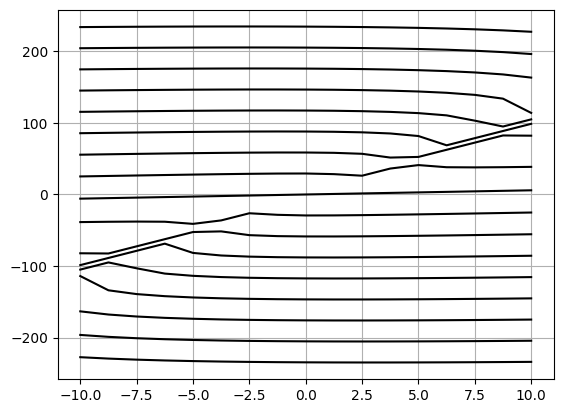

	Valores de Beta


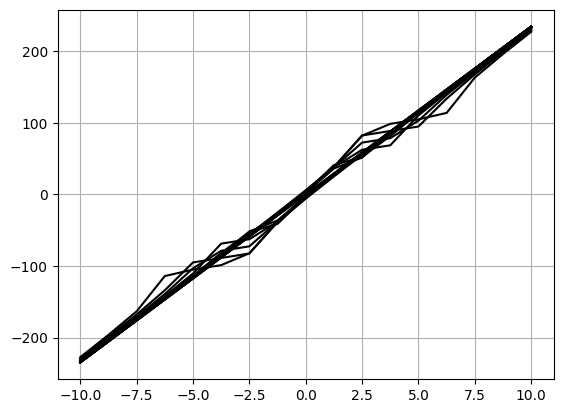

Componente n°2
	Valores de Alfa


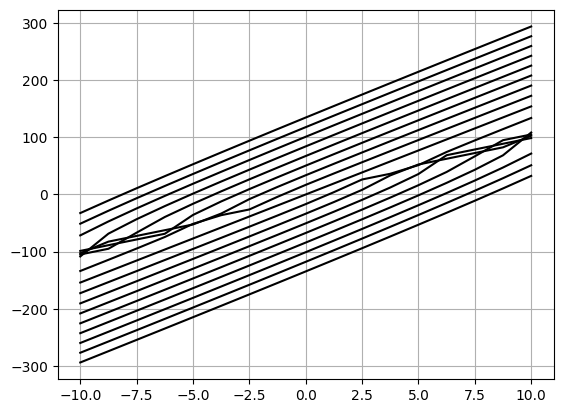

	Valores de Beta


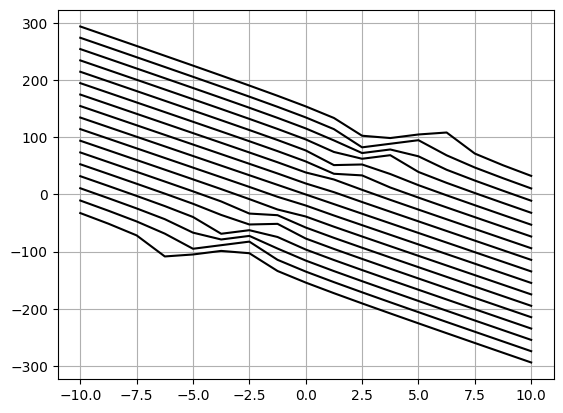

In [21]:
for i in range(dimension):
    print(f"Componente n°{i + 1}")
    print("\tValores de Alfa")
    MostrarSegunEje(True)
    print("\tValores de Beta")
    MostrarSegunEje(False)

Vemos como realmente hay una relación lineal, pero diferentes relaciones entre cada eje.

Ahora veamos como se relaciona con los vectores